# Testing and regularization

In [1]:
!git clone https://github.com/s7s/machine_learning_1.git
%cd  machine_learning_1/polynomial_regression

Cloning into 'machine_learning_1'...
remote: Enumerating objects: 186, done.
remote: Counting objects: 100% (186/186), done.
remote: Compressing objects: 100% (134/134), done.
remote: Total 186 (delta 85), reused 150 (delta 49), pack-reused 0
Receiving objects: 100% (186/186), 34.12 MiB | 21.81 MiB/s, done.
Resolving deltas: 100% (85/85), done.
/content/machine_learning_1/polynomial_regression


In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
random.seed(0)

## Defining our dataset

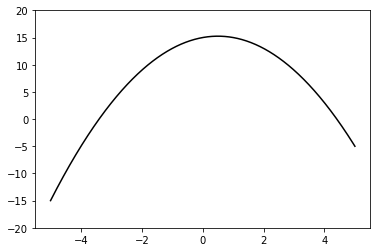

In [4]:
# Our original polynomial is -x^2+x+15
coefs = [15,1,-1]

def polynomial(coefs, x):
    n = len(coefs)
    return sum([coefs[i]*x**i for i in range(n)])

def draw_polynomial(coefs):
    n = len(coefs)
    x = np.linspace(-5, 5, 1000)
    plt.ylim(-20,20)
    plt.plot(x, sum([coefs[i]*x**i for i in range(n)]), linestyle='-', color='black')

draw_polynomial(coefs)

In [5]:
X = []
Y = []
for i in range(40):
    x = random.uniform(-5,5)
    y = polynomial(coefs, x) + random.gauss(0,2)
    X.append(x)
    Y.append(y)
X=np.array(X)
Y=np.array(Y)

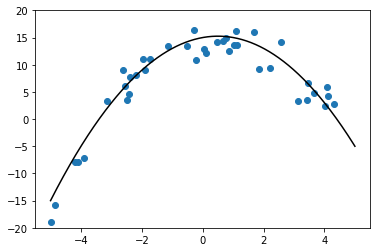

In [12]:
plt.scatter(X, Y)
draw_polynomial(coefs)

## Training a polynomial regression model

In [7]:
for datasample in zip(X,Y):
    print(datasample)

(3.4442185152504816, 6.685961311021467)
(-2.4108324970703663, 4.690236225597948)
(0.11274721368608542, 12.205789026637378)
(-1.9668727392107255, 11.133217991032268)
(-0.23403045847644144, 10.927272159051856)
(0.046868558173902564, 12.8584762866286)
(-2.1816215560029617, 8.16012255928749)
(-2.4949365863755943, 3.5061587527226514)
(4.097462559682402, 5.933186396721837)
(4.021659504395828, 2.454299054753137)
(-1.8985243068066735, 8.956020414039855)
(1.8398393191544127, 9.208004401915796)
(-0.2785728454728664, 16.36505651355184)
(1.1088697344380165, 16.14144978027318)
(4.130110532378982, 4.299534274468492)
(3.6530992777164, 4.83366913200435)
(-2.395076896080406, 7.723543125251446)
(-4.8595829983598104, -15.848718674227753)
(2.1970468640395415, 9.366124268570305)
(1.6815320123185087, 16.070558182542374)
(-4.988571806855717, -18.893035332565795)
(-2.5608912311286804, 6.043189895391749)
(-1.7479563725260991, 11.091071520573042)
(0.6751074062067186, 14.272553413210698)
(-2.6138407138477984, 9.

### Adding columns to our dataset corresponding to $x^2, x^3, \ldots, x^{200}$

In [19]:
from sklearn.preprocessing import PolynomialFeatures
def addPoly(X,polyDegree):
    ## TODO ##
    #use sklearn (PolynomialFeatures method)
    poly = PolynomialFeatures(200,include_bias=False)
    X=poly.fit_transform(X.reshape(-1, 1))
    return X

X_poly=addPoly(X,200)
X_poly.shape

(40, 200)

In [ ]:
print(X_poly.shape)
print(X_poly[0,:])

## Splitting data into training and testing

In [29]:
from sklearn.model_selection import train_test_split
## TODO ##
# use sklearn (train_test_split) to split data to 80% training 20% testing
X_train, X_test, y_train, y_test = train_test_split(X_poly,Y,test_size=.2)


In [30]:
from sklearn.metrics import mean_squared_error
def display_results(model):
    coefs = [model.intercept_]
    coefs += list(model.coef_)
    ytrain_predict=model.predict(X_train)
    ytest_predict=model.predict(X_test)
    train_error=np.sqrt(mean_squared_error(y_train,ytrain_predict))
    test_error=np.sqrt(mean_squared_error(y_test,ytest_predict))
    print("Training error (rmse):", train_error)
    print("Testing error (rmse):", test_error)
    plt.scatter(X_train[:,0], y_train, marker='o')
    plt.scatter(X_test[:,0], y_test, marker='^')
    draw_polynomial(coefs)
    plt.show()
    print("Polynomial coefficients")
    print(coefs)

## Training a polynomial regression model with no regularization

In [33]:
from sklearn.linear_model import LinearRegression
## TODO ##
# use sklearn linear regression to fit the data 
# normalization trick ;)
reg= LinearRegression(normalize=True)
model_no_reg =reg.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


Training error (rmse): 0.1609208837591091
Testing error (rmse): 1218540351305021.0


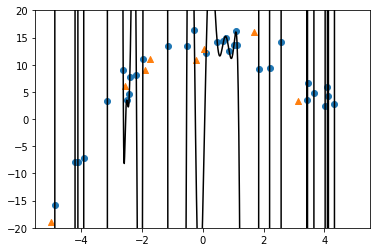

Polynomial coefficients
[-17.184794401170354, 242.01049116055722, 596.9341494126867, -3986.1214872429846, -395.9732045875615, 17059.047729821905, -9162.336791935772, -25468.304770961746, 18231.101137258986, 19076.75638185655, -14384.427660266816, -8570.86293228687, 5977.373586442936, 2466.3220673077144, -1430.7315294510563, -453.58349271294946, 199.44935155608064, 50.4249420444151, -14.998411554133327, -2.8895721181159555, 0.40857976786453065, 0.03344351491299876, 0.01314026050684393, 0.0034006007835237187, -0.000524101734290159, -1.1230314966560116e-05, -2.764760782595357e-05, -4.677863803512214e-06, -7.174919438441776e-08, -1.3579575232236137e-07, 3.715669923452498e-08, 7.296606279680153e-10, 1.8154273034226697e-09, 2.0886685228551231e-10, 3.8596750372497575e-11, 9.294101283966026e-12, -5.751498274255418e-13, 2.1735456135746876e-13, -9.364538087726121e-14, 4.410505660603384e-17, -5.0440008101276785e-15, -2.680962875974711e-16, -1.8630713999715111e-16, -1.5380318135059035e-17, -4.7766

In [34]:
display_results(model_no_reg)

## Training a polynomial regression model with L1 regularization

In [37]:
from sklearn import linear_model
## TODO ##
# use sklearn Lasso (linear regression with L1 Norm) to fit the data 
# normalization trick ;)

model_L1_reg =linear_model.Lasso(alpha=0.1,normalize=True)
model_L1_reg .fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,


Lasso(alpha=0.1, normalize=True)

Training error (rmse): 1.96754924752743
Testing error (rmse): 2.571531971518078


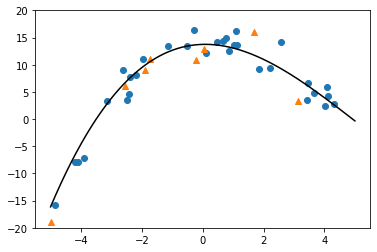

Polynomial coefficients
[13.743423558479428, 0.14493179437541892, -0.8793648694884717, 0.05748184877319829, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -

In [38]:
display_results(model_L1_reg)

## Training a polynomial regression model with L2 regularization

In [39]:
from sklearn import linear_model
## TODO ##
# use sklearn Ridge (linear regression with L2 Norm) to fit the data 
# normalization trick ;)


model_L2_reg =linear_model.Ridge(alpha=0.1,normalize=True)
model_L2_reg .fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,


Ridge(alpha=0.1, normalize=True)

Training error (rmse): 1.9635992886243678
Testing error (rmse): 112.39961604609081


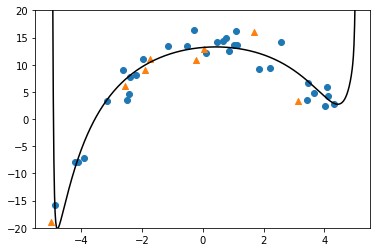

Polynomial coefficients
[13.174940499828157, 0.4733724962159836, -0.556977072961269, 0.017669527011173282, -0.013804270225556865, 0.0007121882114594174, -0.0003161426377554311, 3.0709243606975385e-05, -5.677069853007684e-06, 1.2436961195137198e-06, -4.0245913527837896e-08, 4.532181019866635e-08, 2.67138305150765e-09, 1.5032524099813483e-09, 1.8719849357369275e-10, 4.636006297418468e-11, 8.489882548709745e-12, 1.3499357009864203e-12, 3.321748774034825e-13, 3.733362908163643e-14, 1.2102752306410713e-14, 9.753498137358762e-16, 4.240889531351959e-16, 2.3513811712409296e-17, 1.4535786465545746e-17, 4.882711141910837e-19, 4.924161764943569e-19, 6.559190173908084e-21, 1.6607066104953547e-20, -1.0538464890431823e-22, 5.608022251448031e-22, -1.457442353130515e-23, 1.9055933995283983e-23, -8.74680836268075e-25, 6.544697327059334e-25, -4.3269627662712705e-26, 2.2809528630943127e-26, -1.970867429735733e-27, 8.093884343912104e-28, -8.605846548345491e-29, 2.9313123210113547e-29, -3.672140589383557e-

In [40]:
display_results(model_L2_reg)

## Viewing the predictions in the testing set

In [41]:
import pandas as pd
from IPython.display import display
predictions={}
predictions ['x']=X_test[:,0]
predictions ['y']=y_test
predictions['No reg'] = model_no_reg.predict(X_test)
predictions['L1 reg'] = model_L1_reg.predict(X_test)
predictions['L2 reg'] = model_L2_reg.predict(X_test)
predictions=pd.DataFrame.from_dict(predictions)
display(predictions)

,x,y,No reg,L1 reg,L2 reg
0,-4.988572,-18.893035,-3.446553e+15,-15.999395,298.947120
1,-1.747956,11.091072,1.451964e+03,10.496332,10.399629
2,1.681532,16.070558,-1.533125e+03,11.773987,12.373073
3,-1.898524,8.956020,2.903754e+02,9.905339,9.931879
4,0.046869,12.858476,-4.939400e+00,13.748291,13.195905
5,3.144669,3.266470,6.356117e+05,7.290737,8.366397
6,-0.234030,10.927272,-3.606772e+00,13.660605,13.033383
7,-2.560891,6.043190,-5.665454e+00,6.639857,7.211348
